# FY2045 Quantum Mechanics - Numerical Exercise
Marte K. Høiskar and Maren Lium

## Problem 1

**Task:**
Calculate initial values for $\Psi _I (x, t)$ and $\Psi _R(x, t+\frac{\Delta t}{2})$ using Eq. (8). Normalise the wave function such that

\begin{equation}
\int_{0}^{L} |\Psi (x, t)|^2 \text{d}x = 1.
\end{equation}

Make a plot of the real and imaginary parts of Ψ, selecting suitable values for ∆x,
xs and σs to make your figure look similar to Figure 1. Make sure ∆x is small
enough that each oscillation of the wave function is resolved by enough points to
look fairly smooth. Furthermore, make a plot of the probability density for finding
the particle represented by the wave packet, given by $|Ψ(x, t)|^2$.

#### Solution:
Expanding Eq. (8) produces one real and one imaginary part,

\begin{equation}
\Psi (x, t) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}e^{i(k_0x-\omega t)} = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}(\cos(k_0x-\omega t)+i\sin(k_0x-\omega t)).
\end{equation}

Hence, 

\begin{equation}
\Psi_I (x, t) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\sin(k_0x-\omega t))
\quad\text{and}\quad
\Psi_R \left(x, t + \frac{\Delta t}{2}\right) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\cos\left(k_0x-\omega \left(t+\frac{\Delta t}{2}\right)\right).
\end{equation}

The initial values for $\Psi _I (x, t)$ and $\Psi _R(x, t+\frac{\Delta t}{2})$ are

\begin{equation}
\Psi_I (x, 0) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\sin(k_0x)
\quad\text{and}\quad
\Psi_R \left(x, \frac{\Delta t}{2}\right) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\cos\left(k_0x-\omega \frac{\Delta t}{2}\right).
\end{equation}

In order for the wave function to be normalized, such that 

\begin{equation}
\int_{0}^{L} |\Psi (x, t)|^2 \text{d}x = 1,
\end{equation}

the normalization constant needs to be determined. The normalization constant is given by, 

\begin{equation}
1 = \int_{0}^{L} \left|\Psi (x, t)\right|^2 \text{d}x = \int_{0}^{L} C^2 e^{-\frac{(x-x_s)^2}{{\sigma_x}^2}} \text{d}x \\ 
C^2 = \frac{1} { \int_{0}^{L} e^{-\frac{(x-x_s)^2}{{\sigma_x}^2}} \text{d}x}.
\end{equation}

This expression can be solved numerically.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [18]:
#Constants needed throughout the exercise
L = 20
n = 1000
x_s = 5
k_0 = 20
sigma_x = 1.5
omega = 1
fignum = 1

The cell below determines the normalization constant, C. The functions <font color=blue>psi_imaginary</font> and <font color=blue>psi_real</font> calculates the initial values for $\Psi_I (x, t)$ and $\Psi_R \left(x, t + \frac{\Delta t}{2}\right)$ respectively. These functions are used to plot the real and imaginary parts of the $\Psi$, and to calculate and plot the probability density $|\Psi(x,t)^2|$ of finding the particle represented by the wave packet. 

C = 0.0868


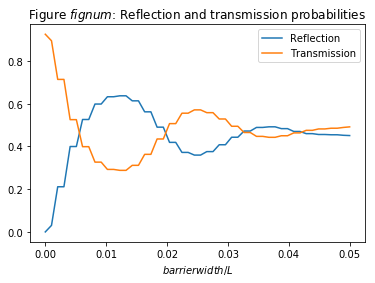

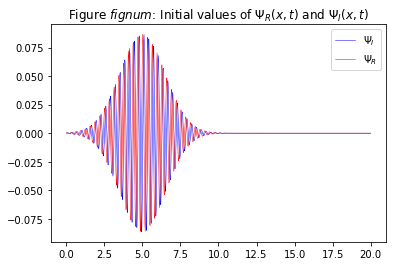

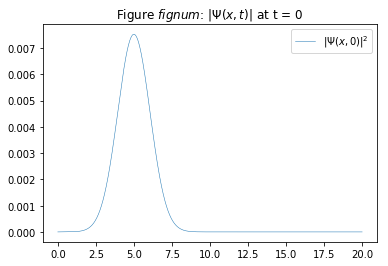

In [19]:
x = np.linspace(0, L, n)

#Determining the normalization constant 
C = 1/np.sqrt(np.sum(np.exp(-(x-x_s)**2 / sigma_x**2)))

print(f"C = {C:.3}")

def psi_imaginary(x, t, sigma_x = sigma_x):
    """Calculates the initial values for the imaginary part of the wave function.
    INPUT: initial value of x, initial value of t, width of the wave packet 
    OUTPUT: the initial values for the imaginary part of the wave packet
    """
    psi_i =  C * np.exp(-(x-x_s)**2/(2*sigma_x**2)) * np.sin(k_0*x - omega*t)
    psi_i[[0,-1]] = 0
    return psi_i


def psi_real(x, t, sigma_x = sigma_x):
    """Calculates the initial values for the real part of the wave function.
    INPUT: initial value of x, initial value of t, width of the wave packet 
    OUTPUT: the initial values for the real part of the wave packet
    """
    psi_r = C * np.exp(-(x-x_s)**2/(2*sigma_x**2)) * np.cos(k_0*x - omega*t)
    psi_r[[0,-1]] = 0
    return psi_r

def prob_density(x, t, sigma_x = sigma_x):
    """Uses the functions psi_real and psi_imaginary to calculate the initial probability density
    INPUT: initial value of x, initial value of t, width of the wave packet 
    OUTPUT: the initial values for probability density associated with the wave packet
    """
    psi = psi_imaginary(x, t, sigma_x)**2 + psi_real(x, t, sigma_x)**2
    return psi


# PLOT OF PSI_I AND PSI_R AT T=0

plt.figure("figure_1")
plt.title(r"Figure ${fignum}$: Initial values of $\Psi_R(x, t)$ and $\Psi_I(x, t)$")
plt.plot(x, psi_imaginary(x, 0), "b-", label=r'$\Psi_{I}$', linewidth=0.5)
plt.plot(x, psi_real(x, 0), "r-", label=r'$\Psi_{R}$', linewidth=0.5)
plt.legend()
plt.show()
fignum += 1

# PLOT OF PROBABILITY DENSITY AT T=0
plt.figure("figure_2")
plt.title(r"Figure ${fignum}$: $|\Psi(x,t)|$ at t = 0")
plt.plot(x, prob_density(x, 0), label=r'$|\Psi(x,0)|^2$', linewidth=0.5)
plt.legend()
plt.show()
fignum +=1

The normalization constant was determined to be C = 0.0868 and the plot of the real and imaginary $\Psi$ with $\Delta x = 0.02$, $x_s = 5$ and $\sigma_x = 1.5$ looks similar to Figure 1 in the exercise instructions. 

## Problem 2

#### Task:
Start out a wave packet at $x_s = 5$, and propagate it a distance $\frac{L}{2}=10$, i.e., until it reaches $x = 15$. This will take a time $T = \frac{L}{2v_g}$, where $v_g$, given by 

\begin{equation}
v_g = \frac{\partial\omega}{\partial k}
\end{equation}

is the group velocity at the wave number k0. Repeat this procedure for different values of σx, for example $\sigma_x = 0.5$, $\sigma_x = 1.0$ and $\sigma_x = 2.0$. Describe what happens,and produce a figure that shows the initial probability density $|\Psi (x, t)|^2$ centered on $x_s = 5$, and the same for the propagated wave centered on $x = 15$, for two
different $\sigma_x$, for example $\sigma_x$ = 1.5 and $\sigma_x$ = 0.5.

To successfully carry out this computation, you will need to choose ∆t as described in the section on numerical stability. Begin by choosing a very small number, for example 100 times smaller than the limit. Propagate the wave function a few timesteps, and plot the results. See if you can increase $\Delta t$ somewhat, as that will make the computations go faster. Describe what happens if you increase $\Delta t$ too much. For the rest of the problems, choose a value for $\Delta t$ which is somewhat smaller than the largest value you found to work.

Note that the computations required for this problem should take no more than a few seconds of computer time.

#### Solution:
The wave packet starts out at $x_s = 5$ and is propagated until it reaches $x = 15$. This will take a time $T = \frac{L}{2v_g}$, where 

\begin{equation}
    v_g = \left. \frac{\partial \omega}{\partial k} \right|_{k_0} = \left. \frac{\partial}{\partial k}\frac{\hbar k^2}{2m} \right|_{k_0} = \left. \frac{\hbar k}{m} \right|_{k_0} = \frac{\hbar k_0}{m}. 
\end{equation}
Hence, $T = \frac{Lm}{2\hbar k_0}$. The imaginary and real parts of the propagated wave packet after one time step $\Delta t$ are given by 

\begin{equation}
    \Psi_I(x, t + \frac{\Delta t}{2}) = \Psi_I(x, t - \frac{\Delta t}{2}) - \Delta t \left[\frac{V(x)}{\hbar}\Psi_R(x,t) - \frac{\hbar}{2m}\frac{\Psi_R(x+\Delta x, t)-2\Psi_R(x,t)+\Psi_R(x-\Delta x,t)}{(\Delta x)^2} \right]
\end{equation}

\begin{equation}
    \Psi_R(x, t + \Delta t) = \Psi_R(x, t) + \Delta t \left[\frac{V(x)}{\hbar}\Psi_I(x,t + \frac{\Delta t}{2}) - \frac{\hbar}{2m}\frac{\Psi_I(x+\Delta x, t + \frac{\Delta t}{2})-2\Psi_I(x,t + \frac{\Delta t}{2})+\Psi_I(x-\Delta x,t + \frac{\Delta t}{2})}{(\Delta x)^2} \right]
\end{equation}

The help function <font color = blue>timpestep</font> uses these equations to calculate the imaginary and real part of the propagated wave packet after one timestep. <font color = blue>propagates</font> calculates the imaginary and real part of the propagated wave packet after a time T with time steps $\Delta t$. 

The time step $\Delta t$ needs to be chosen such that the wave function does not change by a significant fraction during that time step. The limit of $\Delta t$ is given by 

\begin{equation}
    \Delta t \ll \frac{\hbar}{\frac{\hbar^2}{2m(\Delta x)^2}+V_{max}}.
\end{equation}

The function <font color = blue>get_delta_t</font> calculates the time step by multiplying the time step limit with a scaling factor such that the accuracy is conserved. The propagated 

In [20]:
def get_delta_t(scaling_factor, delta_x, V_max = 0):
    """Calculates the time step used in propagating the wave packet 
    INPUT: scaling factor, position step, maximum potential
    OUTPUT: time step
    """
    return scaling_factor / (1/(2*delta_x**2) + V_max)


def timestep(psi_r, psi_i, V = np.zeros(n)):
    '''Calculates the new real and imaginary part of the wave packet after the wave packet has been propagated one
    time step dt. 
    INPUT: psi_r(x, t) and psi_i(x, t - dt/2)
    OUTPUT: psi_r(x, t + dt) and psi_i(x, t + dt/2)
    '''
    
    psi_i -= (dt)*(V*psi_r - (0.5/dx**2)*(np.roll(psi_r, 1) - 2.0*psi_r + np.roll(psi_r, -1)))
    psi_r += (dt)*(V*psi_i - (0.5/dx**2)*(np.roll(psi_i, 1) - 2.0*psi_i + np.roll(psi_i, -1)))
    
    psi_i[[0,-1]] = psi_r[[0,-1]] = 0
    
    return psi_r, psi_i


def propagate(T, dt, V = np.zeros(n), sigma_x = sigma_x):
    '''Propagates a wave given by psi_i(x, t) and psi_r(x, t) for a time T with timesteps dt.
    INPUT: T (time propagated), dt (timestep) 
    OUTPUT: PsiR (array with psi_r for all timesteps), PsiI (array with psi_r for all timesteps)
    '''
    iterations = int(round(T/dt, 0))
    PsiR, PsiI = np.empty((iterations, n)), np.empty((iterations, n))
    psi_r = psi_real(x, dt/2, sigma_x)
    psi_i = psi_imaginary(x, 0, sigma_x)
    PsiR[0], PsiI[0] = psi_r, psi_i
    for i in range(1, iterations):
        psi_r, psi_i = timestep(psi_r, psi_i, V)
        PsiR[i], PsiI[i] = psi_r, psi_i
    return PsiR, PsiI

In [21]:
T = 0.5*L/k_0
dx = L/n
dt = get_delta_t(0.1, dx)

print(f"T = {T}, dt = {dt}, dx = {dx}, it = {int(round(T/dt, 0))}")

PsiR, PsiI = propagate(T, dt) #kan tas vekk?

T = 0.5, dt = 8e-05, dx = 0.02, it = 6250


### Propagation of wave packet for different values of $\sigma_x$

The time step and the time of propagation was calculated to be $\Delta t = 8\cdot10^{-5}$ and $T = 0.5$ respectively. This was used to calculate and plot the imaginary and real part of the propagated wave packet for $\sigma_x = 0.5$, $\sigma_x = 1$ and $\sigma_x = 1.5$, as shown in the next cell.    

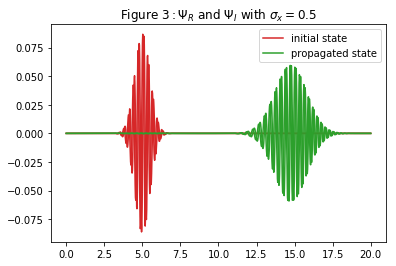

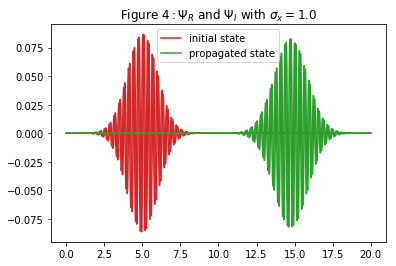

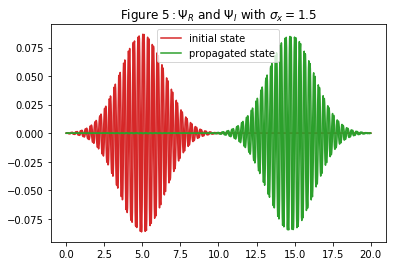

In [22]:
sigmas = np.array([0.5, 1.0, 1.5])

for s in sigmas:
    PsiR, PsiI = propagate(T, dt, np.zeros(n), s)
    plt.figure()
    plt.title(f"Figure ${fignum}: \Psi_R$ and $\Psi_I$ with $\sigma_x = {s} $")
    plt.plot(x, PsiR[0], color='tab:red', label="initial state")
    plt.plot(x, PsiI[0], color='tab:red')
    plt.plot(x, PsiR[-1], color='tab:green', label="propagated state")
    plt.plot(x, PsiI[-1], color='tab:green')
    plt.legend()
    plt.show()
    fignum += 1
    

Figure 3-5 shows the real and imaginary part of the initial and propagated state for different values of $\sigma_x$. $\sigma_x$ describes the width of the wave packet. Therefore, the width increases as $\sigma_x$ increases. However, the width of the wave packet also increases as it's beeing propagated, especially in Figure 3. The width of the wave packet illustrates the uncertainty of the position, $\Delta x$ of the particle. According to Heisenberg's Uncertainty Principle, the uncertainty in the momentum, $\Delta p$ of the particle decrease as the width increases. As the wave packet propagates, $\Delta x$ increases and $\Delta p$ decreases. Why?

In [23]:
fig, ax = plt.subplots()
line1, = ax.plot(x, PsiR[0])
line2, = ax.plot(x, PsiI[0])

def animate(i):
    line1.set_data(x, PsiR[i])
    line2.set_data(x, PsiI[i])

anim = animation.FuncAnimation(fig, animate, interval=20, frames=range(0, len(PsiR), 50)) 

plt.close(anim._fig)
#HTML(anim.to_html5_video())

### Propagation of the probability density $|\Psi(x, t)|^2$
The code in the next cell plots the probability density of the inital and propagated wave packet after a time T with $\sigma_x = 0.5$ and $\sigma_x = 1.5$. 

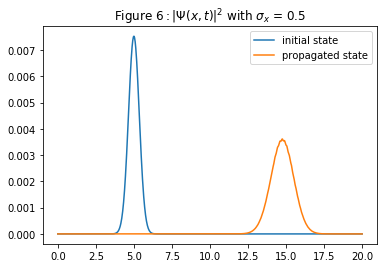

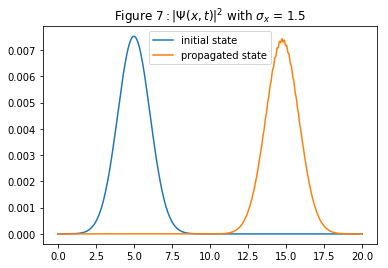

In [24]:
sigmas2 = np.array([0.5, 1.5])
for s in sigmas2:
    PsiR, PsiI = propagate(T, dt, np.zeros(n), s)
    plt.figure()
    plt.title(f"Figure ${fignum}: |\Psi(x,t)|^2$ with $\sigma_x$ = {s}")
    plt.plot(x, PsiR[0]**2 + PsiI[0]**2, label="initial state")
    plt.plot(x, PsiR[-1]**2 + PsiI[-1]**2, label="propagated state")
    plt.legend()
    plt.show()
    fignum += 1
    

## Problem 3

#### Task:
Introduce a barrier of width $l = \frac{L}{50}$ and height $V_0 = \frac{E}{2}$ in the middle of the domain by setting $V(x)$ to

\begin{equation}
V(x)=\begin{cases}
    \frac{E}{2} & \text{if $\frac{L}{2} - \frac{l}{2} < x < \frac{L}{2} + \frac{l}{2}$}.\\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Propagate a wave packet across the barrier. You can use the same T that you found in Problem 2. Produce a plot which shows that the wave function has been partially transmitted, partially reflected. Calculate the probability of reflection and transmission by calculating

\begin{equation}
\int_{0}^{\frac{L}{2}}|\Psi (x, t)|^2 dx 
\quad\text{and}\quad
\int_{\frac{L}{2}}^{L}|\Psi (x, t)|^2 dx. 
\end{equation}

You should confirm that T is large enough that the wave packet has completely cleared the barrier, i.e, your plot should look similar to Figure 2.

#### Solution:
A wave packet is propagated across a barrier of width $l = \frac{L}{50}$ and height $V_0 = \frac{E}{2}$ in the middle of the domain by introducing the potential, 

\begin{equation}
V(x)=\begin{cases}
    \frac{E}{2} & \text{if $\frac{L}{2} - \frac{l}{2} < x < \frac{L}{2} + \frac{l}{2}$}.\\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

The potential is calculated by <font color = blue>potential_width_50</font> and used to plot the propagated wave packet after a time T. Hvorfor har vi både potential_width_50 og potential_generator?

In [25]:
def potential_width_50(V_0):
    potential = np.zeros(n)
    potential[int(n/2.0 *(1 - 1/50.0)) : int(n/2.0 *(1 + 1/50.0))] = V_0
    return potential

def potential_generator(V_0, width):
    pot = np.zeros(n)
    pot[int(n/2.0 *(1 - width)) : int(n/2.0 *(1 + width))] = V_0
    return pot

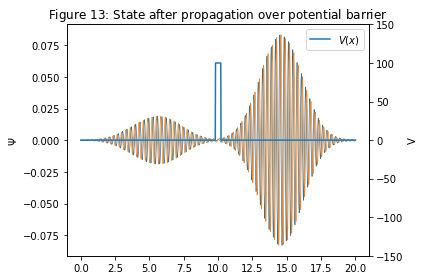

In [36]:
T = 0.5
V_0 = 100
PsiR, PsiI = propagate(T, dt, potential_width_50(V_0))
#PsiR, PsiI = propagate(T, dt, potential_generator(V_0, L/50))
fig, ax1 = plt.subplots()
plt.title(f"Figure ${fignum}$: State after propagation over potential barrier")
ax1.set_ylabel("$\Psi$")
ax1.plot(x, PsiR[-1], label=r"$\Psi_R$", linewidth=0.7)
ax1.plot(x, PsiI[-1], label=r"$\Psi_I$", linewidth=0.7)
ax2 = ax1.twinx()
ax2.set_ylabel("V")
ax2.plot(x, potential_width_50(V_0), label=r"$V(x)$")
ax2.set_ylim(-150, 150)
fig.tight_layout()
plt.legend()
plt.show()
fignum += 1

The probability of reflection, R and transmission, T is calculated by 

\begin{equation}
    R = \int_{L/2}^{0} |\Psi(x,t)|^2 dx \ \ \text{and}\ \ T = \int_{L}^{L/2} |\Psi(x,t)|^2 dx
\end{equation}
in the cell below.


In [33]:
Psi_squared = PsiR[-1]**2 + PsiI[-1]**2
p_reflection = np.sum(Psi_squared[:int(n/2)])
p_transmission = np.sum(Psi_squared[int(n/2):])
print(f"T = {p_transmission} \nR = {p_reflection}")

T = 0.8734050823006017 
R = 0.051721216698290155


Figure 8 shows that the wave function has been partially transmitted and partially reflected after it has propagated across a potential barrier. The calculated probabilities of reflection and transmission are respectively 0.052 and 0.873. The wave packet has not completely cleared the barrier if $T = 0.5$ as in the previous exercises. However, if $T = 1.0$ then the plot looks more similar to Figure 2 in the lab manual.

In [28]:
fig, ax = plt.subplots()
line1, = ax.plot(x, PsiR[0])
line2, = ax.plot(x, PsiI[0])
ax2 = ax.twinx()
ax2.plot(x, potential_width_50(V_0))
ax2.set_ylim(-150, 150)

anim = animation.FuncAnimation(fig, animate, interval=30, frames=range(0, len(PsiR), 50)) 

plt.close(anim._fig)
#HTML(anim.to_html5_video())

## Problem 4

#### Task:
Using the same procedure as in Problem 3, calculate the probabilities of transmission an reflection for 50 different barrier heights V0 from 0E to $\frac{3E}{2}$. Make a graph showing the probabilities of reflection and transmission as a function of $E/V_0$.

#### Solution:
The same procedure as in Problem 3 was used to calculate the probabilities of transmission and reflection for 50 different barrier heights $V_0$ from $0E$ to $\frac{3E}{2}$. The probabilities of transmission and reflection is then plotted as a function of $E/V_0$.

In [37]:
energies = np.linspace(0, 1.5*200, 50)

prob = np.empty((2, 50))

def final_state(T, dt, V):
    """Calculates the final imaginary and real part of the wave packet after being propagated.
    INPUT: time of propagation, time step, potential
    OUTPUT: final state of wave packet after being propagated
    """
    iterations = int(round(T/dt, 0))
    psi_r = psi_real(x, dt/2, sigma_x)
    psi_i = psi_imaginary(x, 0, sigma_x)
    for i in range(1, iterations):
        psi_r, psi_i = timestep(psi_r, psi_i, V)
    return psi_r, psi_i

for i in range(50):
    psi_r, psi_i = final_state(T, dt, potential_width_50(energies[i]))
    psi_sq = psi_r**2 + psi_i**2
    prob[0, i] = np.sum(psi_sq[:int(n/2)])  # reflection probability
    prob[1, i] = np.sum(psi_sq[int(n/2):])  # transmission probability

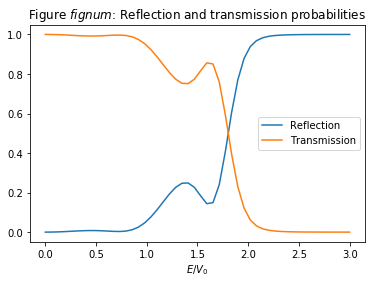

In [38]:
plt.figure()
plt.title("Figure ${fignum}$: Reflection and transmission probabilities")
plt.plot(energies/100.0, prob[0], label="Reflection")
plt.plot(energies/100.0, prob[1], label="Transmission")
plt.xlabel("$E/V_0$")
plt.legend()
plt.show()
fignum += 1

## Problem 5

Using a barrier height of $\frac{9E}{10}$, calculate the probabilities of transmission and reflection for 50 different barrier widths from 0 to $L/20$. Make a graph showing the probabilities of reflection and transmission as a function of barrier width. Note that you will have to use $N_x = 1000$ or larger to be able to resolve all the different barrier thicknesses.

In [39]:
widths = np.linspace(0, 1/20.0, 50)

prob2 = np.empty((2, 50))

for i in range(50):
    psi_r, psi_i = final_state(T, dt, potential_generator(9*20, widths[i]))
    psi_sq = psi_r**2 + psi_i**2
    prob2[0, i] = np.sum(psi_sq[:int(n/2)])  # reflection probability
    prob2[1, i] = np.sum(psi_sq[int(n/2):])  # transmission probability

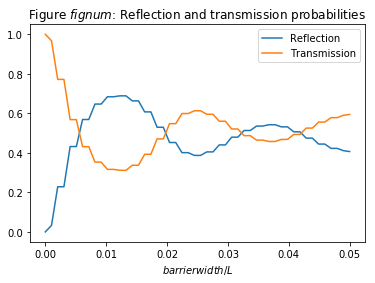

In [40]:
plt.figure()
plt.title("Figure ${fignum}$: Reflection and transmission probabilities")
plt.plot(widths, prob2[0], label="Reflection")
plt.plot(widths, prob2[1], label="Transmission")
plt.xlabel("$barrier width/L$")
plt.legend()
plt.show()
fignum += 1